# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     641.1
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.62e-37
Time:                        20:18:00   Log-Likelihood:                -6.8564
No. Observations:                  50   AIC:                             21.71
Df Residuals:                      46   BIC:                             29.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0744      0.099     51.452      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.57837108  5.03246786  5.4509496   5.80957698  6.09285853  6.29659582
  6.42857326  6.50727915  6.55886808  6.61286385  6.69730874  6.83415627
  7.03566431  7.30238113  7.62305531  7.97648435  8.33499815  8.66900514
  8.95185409  9.16421285  9.29724453  9.35405941  9.3492039   9.30627065
  9.25402229  9.22166586  9.23405413  9.30760242  9.44759153  9.6473002
  9.88910934 10.14739681 10.39274709 10.59678412 10.73683346 10.79964757
 10.78358243 10.69886755 10.56592538 10.4120159  10.26675791 10.15726273
 10.10367989 10.11588663 10.1918651  10.31803385 10.47147929 10.62372024
 10.74538741 10.81104859]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.79067108 10.65182509 10.41195264 10.11080189  9.80069537  9.53371964
  9.34897267  9.2629913   9.26570242  9.32288925]


## Plot comparison

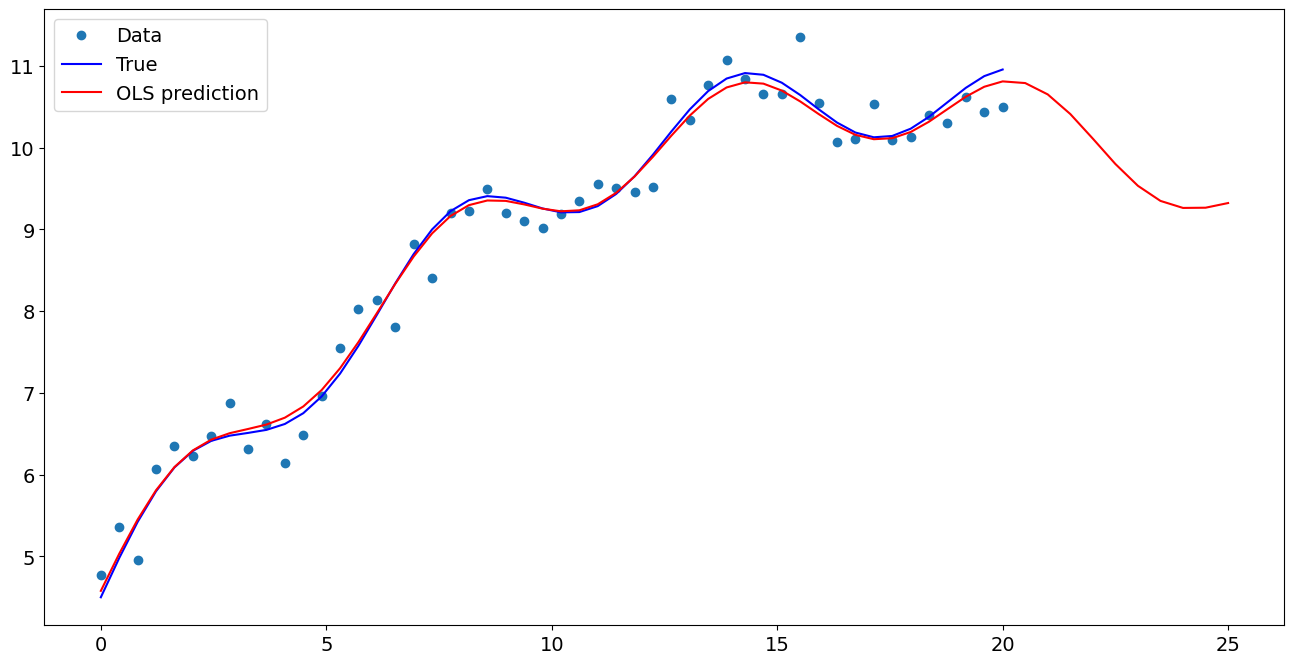

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.074352
x1                  0.489724
np.sin(x1)          0.444765
I((x1 - 5) ** 2)   -0.019839
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.790671
1    10.651825
2    10.411953
3    10.110802
4     9.800695
5     9.533720
6     9.348973
7     9.262991
8     9.265702
9     9.322889
dtype: float64